### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('diabetes.csv')

### EDA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

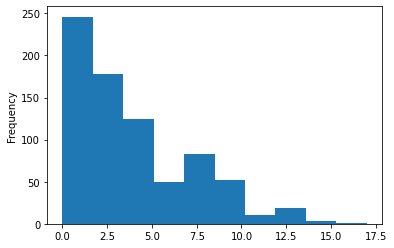

In [9]:
df['Pregnancies'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

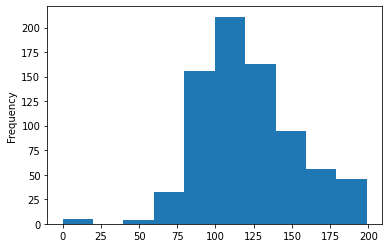

In [10]:
df['Glucose'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

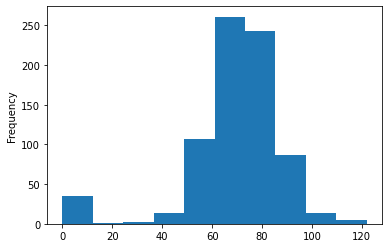

In [11]:
df['BloodPressure'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

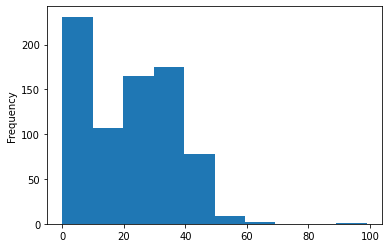

In [12]:
df['SkinThickness'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

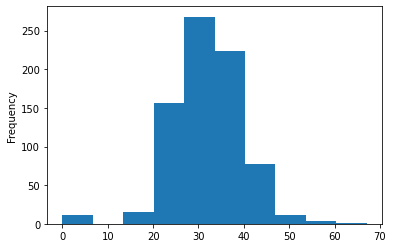

In [13]:
df['BMI'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

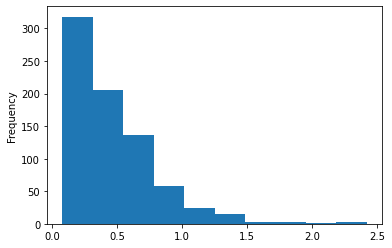

In [14]:
df['DiabetesPedigreeFunction'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

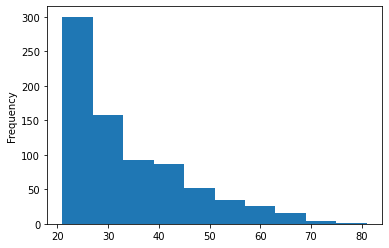

In [15]:
df['Age'].plot(kind='hist')

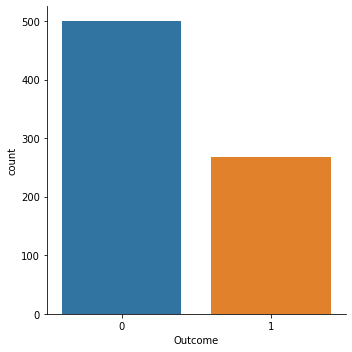

In [16]:
sns.catplot(x='Outcome',data=df,kind='count')

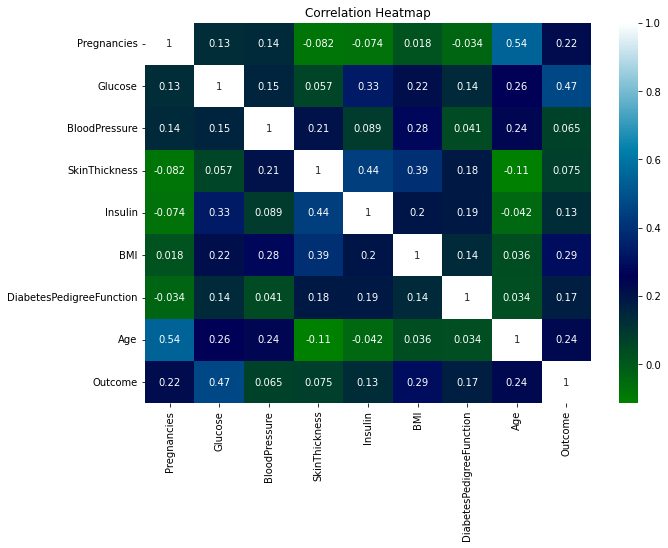

In [17]:
plt.figure(figsize=(10,7))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),annot=True,cmap="ocean")
plt.show()

### Separating dependant and independant variables

In [18]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

### Train-test-split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=42,random_state=42)

### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
print("accuracy score:",accuracy_score(y_test,y_hat))
print("f1 score:",f1_score(y_test,y_hat))

accuracy score: 0.7857142857142857
f1 score: 0.6666666666666665


### Support vector machine

In [22]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')
sc.fit(X_train,y_train)
y_hat2=sc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat2))
print("f1 score:",f1_score(y_test,y_hat2))

accuracy score: 0.7380952380952381
f1 score: 0.6206896551724138


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat3=rc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat3))
print("f1 score:",f1_score(y_test,y_hat3))

accuracy score: 0.7142857142857143
f1 score: 0.6


### Decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat4=dc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat4))
print("f1 score:",f1_score(y_test,y_hat4))

accuracy score: 0.6666666666666666
f1 score: 0.5333333333333333


### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=5)
kc.fit(X_train,y_train)
y_hat5=kc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat5))
print("f1 score:",f1_score(y_test,y_hat5))

accuracy score: 0.7142857142857143
f1 score: 0.6470588235294117


In [26]:
lr.score(X_train,y_train)

0.7865013774104683

In [27]:
lr.score(X_test,y_test)

0.7857142857142857

#### Hence due to accuracy we are going to use logistic regression